In [13]:
import pandas as pd
import rpy2.robjects as robjects
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
sns.set(color_codes=True)
rcParams['figure.figsize'] = 11.7,8.27
rcParams["patch.force_edgecolor"] = True

In [3]:
r = robjects.r
r.source("PeaksAnnotation_R.r")

/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: grid

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: IRanges

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked f

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7f853dc41e48 / R:0x2da58508>
[SignatureTranslatedFunc..., BoolVector]
  value: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x7f853dc41748 / R:0x2dbd11f0>
  visible: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x7f853dc41ec8 / R:0x25da678>
[       0]

In [3]:
targets = [("H3K27ac", "_narrow"), ("H3K27me3", "_narrow"), ("H3K36me3", "_narrow"), ("H3K4me1", "_narrow"), ("H3K4me2", "_narrow"), ("H3K4me3", "_narrow"), ("H3K79me2", ""), 
           ("H3K9ac", "_narrow"), ("H3K9me3", ""), ("H4K20me1", "")]

In [7]:
d = {}
for target in targets:
    anno = pd.read_csv("../all_marks/" + target[0] + "/peaks_anno.csv", sep="\t")
    d[target[0]] = len(anno['peak'].unique())

In [8]:
d

{'H3K27ac': 709090,
 'H3K27me3': 169244,
 'H3K36me3': 246224,
 'H3K4me1': 661055,
 'H3K4me2': 647160,
 'H3K4me3': 498115,
 'H3K79me2': 166404,
 'H3K9ac': 285738,
 'H3K9me3': 222443,
 'H4K20me1': 170144}

In [4]:
d = {}
for target in targets:
    anno = pd.read_csv("../all_marks/" + target[0] + "/peaks_anno.csv", sep="\t")
    d[target[0]] = len(anno['feature'].unique())

In [5]:
d

{'H3K27ac': 52116,
 'H3K27me3': 47322,
 'H3K36me3': 51752,
 'H3K4me1': 54150,
 'H3K4me2': 49500,
 'H3K4me3': 46433,
 'H3K79me2': 45857,
 'H3K9ac': 38083,
 'H3K9me3': 44335,
 'H4K20me1': 41804}

In [5]:
def makeAnnotation(target):
    r.peaksAnno("../all_marks/" + target + "/merged_peaks_first_in_biosample.bed", 
                "../all_marks/" + target + "/peaks_anno.csv")
    
    anno = pd.read_csv("../all_marks/" + target + "/peaks_anno.csv", sep="\t")
    pd.read_csv("../all_marks/" + "H3K27me3" + "/narrow_2_peaks_signal_matrix_norm.csv", sep="\t", index_col=0).head()
    anno = anno[anno['insideFeature'].notnull()]
    anno = anno[anno.feature.str.startswith('ENSG')]
    
    anno.to_csv("../all_marks/" + target + "/peaks_anno.csv", sep="\t", index=None)

In [25]:
def makeAnnotation(path, path_out):
    r.peaksAnno(path, path_out)
    
    anno = pd.read_csv(path_out, sep="\t")
    
    anno = anno[anno['insideFeature'].notnull()]
    anno = anno[anno.feature.str.startswith('ENSG')]
    
    anno.to_csv(path_out, sep="\t", index=None)

In [10]:
makeAnnotation("../all_marks/H3K27me3/merged_broad_2_peaks_first_in_biosample.bed", "../all_marks/H3K27me3/broad_2_peaks_anno.csv")

/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Import genomic features from the file as a GRanges object ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: OK

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Prepare the 'metadata' data frame ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Make the TxDb object ... 
  warnings.warn(x, RRuntimeWarning)


[1]
 "count annotation, write to file"




In [5]:
makeAnnotation("../all_marks/H3K27me3/merged_narrow_2_peaks_first_in_biosample.bed", "../all_marks/H3K27me3/narrow_2_peaks_anno.csv")

/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Import genomic features from the file as a GRanges object ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: OK

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Prepare the 'metadata' data frame ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Make the TxDb object ... 
  warnings.warn(x, RRuntimeWarning)


[1]
 "count annotation, write to file"




In [5]:
makeAnnotation("../all_marks/H3K27me3/merged_narrow_peaks_first_in_biosample.bed", "../all_marks/H3K27me3/narrow_peaks_anno.csv")

/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Import genomic features from the file as a GRanges object ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: OK

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Prepare the 'metadata' data frame ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Make the TxDb object ... 
  warnings.warn(x, RRuntimeWarning)


[1]
 "count annotation, write to file"




In [ ]:
makeAnnotation("../all_marks/methylation/peaks_coords.bed", "../all_marks/methylation/peaks_anno.csv")

In [28]:
for f in Path("../eCLIP/ChIPseq_for_lncRNA_RBPs/K562/").iterdir():
    makeAnnotation(str(f), str(f.parents[0] / (f.stem + "_K562_anno.csv")))
    
for f in Path("../eCLIP/ChIPseq_for_lncRNA_RBPs/HepG2/").iterdir():
    makeAnnotation(str(f), str(f.parents[0] / (f.stem + "_HepG2_anno.csv")))

RRuntimeError: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec,  : 
  scan() expected 'a real', got '*'


In [6]:
bed = pd.read_csv("../eCLIP/SAFB_peaks.bedsmall", header=None, sep="\t")

In [7]:
bed.head()

,0,1,2,3
0,chr6,167825917,167826287,peak_0
1,chr17,80454659,80455029,peak_1
2,chr16,88687852,88688222,peak_2
3,chr8,37736867,37737237,peak_3
4,chr5,134524424,134524794,peak_4


In [17]:
k562_ch = "../eCLIP/ChIPseq_for_lncRNA_RBPs/K562/"
hep_g2 = "../eCLIP/ChIPseq_for_lncRNA_RBPs/HepG2/"

for f in Path("../eCLIP/ChIPseq_for_lncRNA_RBPs/K562/").iterdir():
    c = pd.read_csv(f, sep="\t", header=None)
    c[3] = ["peak_" + str(i) for i in c.index]
    c[[0, 1, 2, 3]].to_csv(f, sep="\t", index=None, header=None)
    
for f in Path("../eCLIP/ChIPseq_for_lncRNA_RBPs/HepG2/").iterdir():
    c = pd.read_csv(f, sep="\t", header=None)
    c[3] = ["peak_" + str(i) for i in c.index]
    c[[0, 1, 2, 3]].to_csv(f, sep="\t", index=None, header=None)

In [24]:
bed[3] = ["peak_" + str(i) for i in bed.index]

In [26]:
bed.to_csv("../eCLIP/SAFB_peaks.bedsmall", sep="\t", index=None, header=None)

'../eCLIP/ChIPseq_for_lncRNA_RBPs/K562'

In [7]:
for target in targets:
    makeAnnotation(target[0])
    print("make annotation for " + target[0] + "...")

/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Import genomic features from the file as a GRanges object ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: OK

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Prepare the 'metadata' data frame ... 
  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Make the TxDb object ... 
  warnings.warn(x, RRuntimeWarning)


[1]
 "count annotation, write to file"


make annotation for H3K4me1...
[1]
 "count annotation, write to file"


make annotation for H3K4me2...
[1]
 "count annotation, write to file"


make annotation for H3K4me3...
[1]
 "count annotation, write to file"


make annotation for H3K79me2...
[1]
 "count annotation, write to file"


make annotation for H3K9ac...
[1]
 "count annotation, write to file"


make annotation for H3K9me3...
[1]
 "count annotation, write to file"


make annotation for H4K20me1...


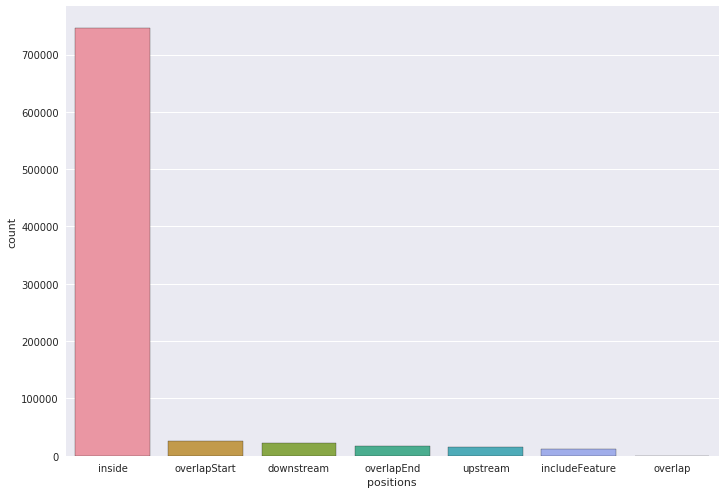

In [12]:
pos = anno['insideFeature'].value_counts()
ax = sns.barplot(pos.index, pos.values)
ax.set(xlabel='positions', ylabel='count')
#ax.set_yticks(range(0, 700001, 30000))
plt.show()